# Requirement Specification for Product Allocation Algorithm

## Objective

1. To minimize the maximum transportation time across all warehouse-order allocations as represented in the Allocation Matrix.

## Input Parameters

1. **Transport Time Matrix (X)**: A matrix that represents the transport time (per unit) between each warehouse and each order.
2. **Demand Array (Y)**: An array that specifies the demand for each order.
3. **Stock Array (Z)**: An array that details the current stock of the product in each warehouse.

## Output Parameters

1. **Allocation Matrix (A)**: A matrix indicating the volume of the product that will be transported from each warehouse to each order.
2. **Minimized Maximum Transport Time**: The smallest maximum transport time that can be achieved. where transport time is calculated by multiplying the transport time per unit with the volume of the product transported.
## Constraints

1. For each order $i$, $\sum_{j} A_{ij} = Y_i$, where $A_{ij}$ is the volume allocated from warehouse $j$ to order $i$.
2. For each warehouse $j$, $\sum_{i} A_{ij} \leq Z_j$, where $Z_j$ is the inventory in warehouse $j$.
3. For each warehouse $j$ and order $i$, $A_{ij} \geq 0$.



# Algorithm Plan for Product Allocation

Here is a comprehensive and step-by-step algorithm plan to tackle the problem. This plan aims to be clear, practical, and implemented in a Python Notebook.

#### Pre-processing: Validate Inputs

Before diving into the main algorithm, validate the input data to ensure compatibility and correctness.

```python
# Validate the inputs
is_valid, msg = validate_inputs(X, Y, Z)
if not is_valid:
    raise ValueError(msg)
```

#### Step 1: Problem Formulation and Graph Building

1. **Initialize Graph Data Structures**

    - Initialize an adjacency list to represent the directed graph.
  
    ```python
    from collections import defaultdict
    graph = defaultdict(list)
    ```

2. **Add Nodes and Edges**

    - Create nodes for each warehouse (`W1, W2, ...`) and each order (`O1, O2, ...`). Add a source (`S`) and sink (`T`) node.
    
    - Connect these nodes based on the arrays `X, Y, Z`.
  
    ```python
    def build_graph(X, Y, Z):
        # Your code to build the graph here
        return graph

    graph = build_graph(X, Y, Z)
    ```

####  Step 3: Binary Search with Min-Cost Max-Flow

0. **Calculate Bounds**

    - Calculate the lower and upper bounds for the maximum transport time from the matrix `X`.

    ```python
    lower_bound = np.min(X)
    upper_bound = np.max(X)
    ```



1. **Loop Condition and Initialization**

    ```python
    best_max_time = upper_bound
    while lower_bound <= upper_bound:
    ```

2. **Modify Graph Based on `T`**

    - For each `T` value, modify the graph to either remove or highly penalize edges with a cost greater than `T`.

    ```python
    def modify_graph(graph, X, T):
        # Your code to modify the graph here
        return modified_graph
    ```

3. **Run Min-Cost Max-Flow Algorithm**

    - Implement the Min-Cost Max-Flow algorithm to check if the current `T` allows all orders to be satisfied.

    ```python
    def min_cost_max_flow(graph):
        # Your code for min-cost max-flow here
        return feasible

    feasible = min_cost_max_flow(modified_graph)
    ```

4. **Update Bounds**

    - Update `lower_bound` or `upper_bound` based on whether all orders can be satisfied.
    
    ```python
    if feasible:
        best_max_time = T
        upper_bound = T - 1
    else:
        lower_bound = T + 1
    ```

#### Step 4: Extract and Validate the Optimal Allocation

1. **Run Min-Cost Max-Flow One Final Time**

    - Generate the final graph with the `best_max_time` and get the flows.

    ```python
    final_graph = modify_graph(graph, X, best_max_time)
    min_cost_max_flow(final_graph)
    ```

2. **Extract Allocation Matrix `A`**

    ```python
    def extract_allocations(final_graph):
        # Your code to extract allocations
        return A

    A = extract_allocations(final_graph)
    ```

3. **Validate Results**

    - Ensure that the sum of allocations for each order ≥ demand and for each warehouse ≤ inventory.

    ```python
    def validate(A, Y, Z):
        # Your code to validate the result
        return is_valid, msg

    is_valid, msg = validate(A, Y, Z)
    if not is_valid:
        raise ValueError(msg)
    ```

After implementing each function or segment of code, remember to test it thoroughly in your Python Notebook before proceeding to the next step. This ensures that the algorithm is working as expected at each stage.

Test case 1 (All orders can be satisfied, no priority needed): Inputs are valid
Test case 2 (Not all orders can be satisfied, and priority comes into play): Inputs are valid
Test case 3 (All orders can be satisfied, but not in a greedy manner): Inputs are valid
Test case 4 (Not all orders can be satisfied, and priority comes into play): Inputs are valid
Test case 5 (All orders can be satisfied, no priority needed): Inputs are valid
Test case 6 (Not all orders can be satisfied, but all warehouses can contribute to the high priority order): Inputs are valid
Test case 7 (Complex case): Inputs are valid


# implementation



## Step0: data processing

### Explanation and Logic

In the code below, we are preparing a set of test cases as JSON data to evaluate the performance of a product allocation algorithm. The algorithm allocates products from multiple warehouses to multiple orders, considering transport time and priority order.

#### Test Case Data Structure

1. `X`: This is a 2D array representing the transportation time matrix. Each entry `X[i, j]` specifies the unit time required to transfer a product from warehouse `j` to order `i`.
   
2. `Y`: This is a 1D array specifying the demand for each order.

3. `Z`: This is a 1D array representing the current stock of the product in each warehouse.

4. `priority_order`: This 1D array represents the priority order in which orders should be fulfilled when not all orders can be met.

5. `description`: This is a text field for human-readable notes about what the test case represents.

#### Code Steps

1. **Import Required Libraries**: The NumPy library for array manipulations and the `json` library for JSON file operations are imported.

2. **Prepare Handcrafted Data**: Two lists, `handcrafted_data` and `all_test_cases_priority`, are created to store various scenarios as test cases. Each test case is a dictionary containing the keys mentioned above.

3. **Convert NumPy Arrays to Lists**: Since JSON does not support NumPy arrays, the NumPy arrays are converted to Python lists. This is essential for serialization.

4. **Save as JSON**: Finally, all the handcrafted test cases are saved in a JSON file for future use or evaluation.

This dataset will serve as the input for evaluating the product allocation algorithm, ensuring it performs as expected under various conditions.

In [72]:
# Importing json library to work with JSON files
import json

import numpy as np

# Prepare the handcrafted data to be saved in JSON
handcrafted_data =  [
    {
        'X': np.array([[4, 2], [3, 2]]),
        'Y': np.array([1, 1]),
        'Z': np.array([3, 4]),
        'priority_order': np.array([0, 1]),
        'description': "All orders can be satisfied, no priority needed"
    },
    {
        'X': np.array([[2, 8], [1, 4]]),
        'Y': np.array([10, 5]),
        'Z': np.array([5, 5]),
        'priority_order': np.array([0, 1]),
        'description': "Not all orders can be satisfied, and priority comes into play"
    },
    {
        'X': np.array([[1, 1], [1, 2]]),
        'Y': np.array([1, 1]),
        'Z': np.array([1, 1]),
        'priority_order': np.array([0, 1]),
        'description': "All orders can be satisfied, but not in a greedy manner"
    },
    {
        'X': np.array([[1], [0], [2]]),
        'Y': np.array([1, 1, 2]),
        'Z': np.array([2]),
        'priority_order': np.array([2, 1, 0]),
        'description': "Not all orders can be satisfied, and priority comes into play"
    },
    {
        'X': np.array([[1]]),
        'Y': np.array([1]),
        'Z': np.array([1]),
        'priority_order': np.array([0]),
        'description': "All orders can be satisfied, no priority needed"
    },
    {
        'X': np.array([[1, 1], [0, 0]]),
        'Y': np.array([1, 1]),
        'Z': np.array([1, 1]),
        'priority_order': np.array([1, 0]),
        'description': "Not all orders can be satisfied, but all warehouses can contribute to the high priority order"
    },
    {
        'X': np.array([[1., 4.],
                    [2., 2.],
                    [4., 2.],
                    [2., 1.],
                    [1., 4.]]), 
        'Y': np.array([46., 26.,  6., 27., 17.]),
        'Z': np.array([2., 18.]),
        'priority_order': np.array([3, 4, 1, 0, 2]),
        'description': "Complex case"
    }
]

all_test_cases_priority =  [
    {
        'X': np.array([[2, 3], [3, 2]]),
        'Y': np.array([1, 2]),
        'Z': np.array([2, 2]),
        'priority_order': np.array([0, 1]),
        'description': "All orders can be satisfied, multiple optimal solutions"
    },
    {
        'X': np.array([[1, 10], [10, 1]]),
        'Y': np.array([1, 1]),
        'Z': np.array([1, 1]),
        'priority_order': np.array([0, 1]),
        'description': "All orders can be satisfied, optimal solution is non-obvious"
    },
    {
        'X': np.array([[1, 1], [1, 1]]),
        'Y': np.array([2, 2]),
        'Z': np.array([2, 1]),
        'priority_order': np.array([0, 1]),
        'description': "Not all orders can be satisfied due to limited inventory"
    },
    {
        'X': np.array([[5]]),
        'Y': np.array([1]),
        'Z': np.array([1]),
        'priority_order': np.array([0]),
        'description': "Single warehouse and single order"
    },
    {
        'X': np.array([[1, 2, 3], [3, 2, 1]]),
        'Y': np.array([1, 1]),
        'Z': np.array([1, 1, 1]),
        'priority_order': np.array([0, 1]),
        'description': "More warehouses than orders"
    },
    {
        'X': np.array([[1], [2], [3]]),
        'Y': np.array([1, 1, 1]),
        'Z': np.array([1]),
        'priority_order': np.array([0, 1, 2]),
        'description': "More orders than warehouses"
    }
]

# Combine all handcrafted data
all_handcrafted_data = handcrafted_data + all_test_cases_priority
for case in all_handcrafted_data:
    case['X'] = case['X'].tolist() if isinstance(case['X'], np.ndarray) else case['X']
    case['Y'] = case['Y'].tolist() if isinstance(case['Y'], np.ndarray) else case['Y']
    case['Z'] = case['Z'].tolist() if isinstance(case['Z'], np.ndarray) else case['Z']
    case['priority_order'] = case['priority_order'].tolist() if isinstance(case['priority_order'], np.ndarray) else case['priority_order']

# Save handcrafted data to a JSON file
json_file_path = 'handcrafted_test_data.json'
with open(json_file_path, 'w') as f:
    json.dump(all_handcrafted_data, f)


In [70]:
def generate_test_data(num_cases=5, num_warehouses=2, num_orders=2, 
                       max_time=10, max_inventory=5, max_demand=5, 
                       include_handcrafted=False, json_file_path=None):
    test_data = []
    
    # Include handcrafted test data if specified
    if include_handcrafted and json_file_path:
        with open(json_file_path, 'r') as f:
            handcrafted_data = json.load(f)
        for case in handcrafted_data:
            case['X'] = np.array(case['X'])
            case['Y'] = np.array(case['Y'])
            case['Z'] = np.array(case['Z'])
            case['priority_order'] = np.array(case['priority_order'])
        test_data.extend(handcrafted_data)
    
    # Generate random test data
    for _ in range(num_cases):
        # Generate random transport time matrix X
        X = np.random.randint(1, max_time + 1, size=(num_orders, num_warehouses))
        # Generate random inventory array Z and demand array Y
        Z = np.random.randint(1, max_inventory + 1, size=num_warehouses)
        Y = np.random.randint(1, max_demand + 1, size=num_orders)
        # Generate random priority order for orders
        priority_order = np.arange(num_orders)
        np.random.shuffle(priority_order)
        test_data.append({
            'X': X,
            'Y': Y,
            'Z': Z,
            'priority_order': priority_order,
            'description': "Randomly generated test case"
        })
    
    return test_data

# Verify that the function works with the JSON file
test_data_with_handcrafted = generate_test_data(include_handcrafted=True, json_file_path=json_file_path)
test_data_with_handcrafted[0]
test_data_random = generate_test_data(num_cases=5, num_warehouses=2, num_orders=2)
test_data_random[0]

{'X': array([[3, 9],
        [7, 9]]),
 'Y': array([1, 2]),
 'Z': array([5, 3]),
 'priority_order': array([1, 0]),
 'description': 'Randomly generated test case'}

Certainly, organizing the content with appropriate subheadings will make the information more digestible. Here's the restructured content:

---

## **Step 1: Graph Building**

### **Overview**

Below is an explanation using 1-based indexing on the first element in test_data. Rows in the matrix $X$ represent orders and columns represent warehouses.

### **Test Case Breakdown**

1. **Transport Time Matrix (X)**

$$ 
X = \begin{bmatrix}
4 & 2 \\
3 & 2 \\
\end{bmatrix}
$$

Represents transportation time from each warehouse (columns) to each order (rows). For instance, $X_{1,2}$ = 2 denotes the time to transport from Warehouse 2 to Order 1.

2. **Demand Array (Y)**

$$ 
Y = \begin{bmatrix}
1 \\
1 \\
\end{bmatrix}
$$

Both Order 1 and Order 2 require 1 unit of the product.

3. **Stock Array (Z)**

$$ 
Z = \begin{bmatrix}
3 \\
4 \\
\end{bmatrix}
$$

Warehouse 1 stocks 3 units of the product, and Warehouse 2 has 4 units.

### **Graph Connections Explained**

1. **Source Node ('S') Connections**
   - 'W1' capacity: $Z_1$ = 3, zero cost. Warehouse 1 can provide up to 3 units.
   - 'W2' capacity: $Z_2$ = 4, zero cost. Warehouse 2 can provide up to 4 units.

2. **Warehouse to Order Connections**
   - 'W1' to 'O1': Infinite capacity, cost of $X_{1,1}$ = 4.
   - 'W1' to 'O2': Infinite capacity, cost of $X_{2,1}$ = 3.
   - 'W2' to 'O1': Infinite capacity, cost of $X_{1,2}$ = 2.
   - 'W2' to 'O2': Infinite capacity, cost of $X_{2,2}$ = 2.

3. **Order Nodes to Sink Node ('T') Connections**
   - 'O1' to 'T' capacity: $Y_1$ = 1, zero cost.
   - 'O2' to 'T' capacity: $Y_2$ = 1, zero cost.

### **Graph Interpretation**

- **Unit Time Representation**
   The time is represented by the cost on edges connecting warehouses to orders, illustrating the transportation time per product unit between specific warehouses and orders.

- **Understanding Flow**
   The flow in a network signifies item quantity moving along edges. For this scenario, it denotes units transported from each warehouse to each order.

---

## **Explanation and Logic Behind the Code**

### **Function Descriptions**

#### **1. build_graph Function**

- **Initialize Graph**: Using NetworkX, a directed graph `G` is initialized.
- **Source and Sink Nodes**: Defined as `'source'` and `'sink'`.
- **Edges from Source to Warehouses**: Capacities are set to the inventory levels (`Z`) of each warehouse.
- **Edges from Warehouses to Orders**: Edges added only if transport time is ≤ `max_time`. Capacities are infinite unless restricted by warehouse inventory.
- **Edges from Orders to Sink**: Capacities are set to each order's demand (`Y`).
- **Output**: Returns the directed graph `G`.

#### **2. visualize_graph_with_data Function**

- **Define Node Positions**: Specify node positions manually for clearer visualization.
- **Draw the Graph**: Using NetworkX and Matplotlib, the graph is drawn with node labels, sizes, and colors.
- **Edge Labels**: Display capacities as edge labels in graph visualization.
- **Print Matrices**: Display `X`, `Y`, and `Z` matrices for reference.

### **Function Significance**

`build_graph` is critical for modeling the optimization problem as max-flow/min-cut in network theory. Meanwhile, `visualize_graph_with_data` offers a visual inspection of the problem setup, ensuring accuracy in representing the underlying product allocation problem. Together, these functions structure the problem logically and allow for structure validation through visual inspection.

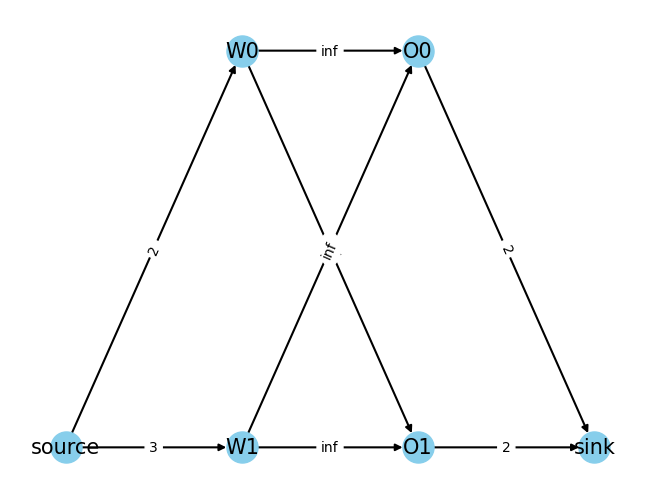

Matrix X (Transport Time):
[[6 9]
 [8 1]]

Vector Y (Demand):
[2 2]

Vector Z (Stock):
[2 3]


In [73]:
import networkx as nx
# Step 2: Build Graph

def build_graph(X, Y, Z, max_time):
    # Create a directed graph
    G = nx.DiGraph()
    
    # Add source and sink nodes
    source = 'source'
    sink = 'sink'
    
    # Add edges from source to warehouses
    for i, z in enumerate(Z):
        G.add_edge(source, f'W{i}', capacity=z)
    
    # Add edges from warehouses to orders
    for i, row in enumerate(X):
        for j, time in enumerate(row):
            if time <= max_time:  # Only add edge if it meets the max_time constraint
                G.add_edge(f'W{j}', f'O{i}', capacity=float('inf'))
    
    # Add edges from orders to sink
    for i, y in enumerate(Y):
        G.add_edge(f'O{i}', sink, capacity=y)
        
    return G

# Test the functions
test_data_sample = generate_test_data()[0]  # Get the first sample test data
G = build_graph(test_data_sample['X'], test_data_sample['Y'], test_data_sample['Z'], 10)  # Build graph with max_time = 10

# Show graph edges to validate
G.edges(data=True)


import matplotlib.pyplot as plt

# Re-define the function to visualize the graph
def visualize_graph_with_data(G, X, Y, Z):
    """
    Visualizes a given bipartite graph with associated matrices using networkx and matplotlib.
    
    :param G: The graph to visualize
    :param X: Transport Time Matrix
    :param Y: Demand Array
    :param Z: Stock Array
    """
    
    # Manually define positions for nodes
    pos = {}
    num_warehouses = Z.shape[0]
    num_orders = Y.shape[0]
    
    max_vertical = max(num_warehouses, num_orders)
    mid_vertical = max_vertical / 2

    pos['source'] = (0, mid_vertical)
    for w in range(num_warehouses):
        pos[f"W{w}"] = (1, max_vertical - w)  # Vertically list warehouses next to 'S'
    for o in range(num_orders):
        pos[f"O{o}"] = (2, max_vertical - o)  # Vertically list orders next to 'Ws'
    pos['sink'] = (3, mid_vertical)

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=15, width=1.5)
    labels = nx.get_edge_attributes(G, 'capacity')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    plt.show()

    # Print matrices as text
    print("Matrix X (Transport Time):")
    print(X)
    print("\nVector Y (Demand):")
    print(Y)
    print("\nVector Z (Stock):")
    print(Z)

# Test the visualization function
visualize_graph_with_data(G, test_data_sample['X'], test_data_sample['Y'], test_data_sample['Z'])


## **Step 2: Optimizing Product Allocation**

### **Objective**

The aim of the `find_optimal_allocation_fixed` function is to ascertain the best product distribution across various warehouses and orders. The distribution ensures not only that the maximum transportation time is minimized but also that the products are allocated most effectively. The approach cleverly employs a binary search to fine-tune the feasible maximum transportation time, while the max-flow algorithm verifies the practicability of every proposed value.

### **Process Breakdown**

1. **Initiating Binary Search**: 
   - The transportation time between any given warehouse and order is defined within a set bracket. The minimum time in matrix `X` indicates the shortest transportation period for any warehouse-order pair, and the maximum time in matrix `X`, multiplied by the total demand, sets the cap. These values guide the binary search as the `lower_bound` and `upper_bound`.

2. **Binary Search Iteration**: 
   - This phase forms the core of the binary search technique.
   - To deduce the most likely maximum transportation time, a midpoint (`mid_value`) between the `lower_bound` and `upper_bound` is evaluated.
   - Leveraging the earlier mentioned `build_graph` function, a flow network graph (`G`) is sculpted, considering the `mid_value` as the highest permissible transportation duration.
   - The `maximum_flow` function from NetworkX provides the optimum flow, presenting a dictionary (`flow_dict`) detailing the flow between each node pairing.
   - If the resulting flow from all order nodes to the sink fulfills the demand, it implies that the current `mid_value` is achievable. The upper bound is then readjusted, and the flow is stored. Otherwise, the binary search proceeds by recalibrating the lower bound.

3. **Determining Optimal Distribution**: 
   - On concluding the loop, the best flow is identified (`optimal_flow_dict`). From this flow dictionary, we distill the allocation matrix `A`, which prescribes the quantity of product to be dispatched from every warehouse to each corresponding order. This ensures demand is met while maintaining the shortest maximum transportation duration.
   - The ensuing step involves computing the precise maximum transportation time using the `A` matrix and the original transportation time matrix `X`.

4. **Concluding Output**: 
   - The method wraps up by returning the `A` allocation matrix along with the computed maximum transportation period (`max_time`).

In [94]:
# Update the function to call the previous build_graph function

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Your build_graph function would be here

def find_optimal_allocation_fixed(X, Y, Z):
    # Initialize lower and upper bounds for binary search
    lower_bound = np.min(X)
    upper_bound = np.max(X) * np.sum(Y)
    
    # Initialize variables to store the optimal allocation strategy
    optimal_flow_dict = None
    optimal_G = None
    while lower_bound <= upper_bound:
        # Calculate mid-value
        mid_value = (lower_bound + upper_bound) // 2
        
        # Build the graph using the build_graph function
        G = build_graph(X, Y, Z, mid_value)
        
        # Run max-flow algorithm
        flow_value, flow_dict = nx.maximum_flow(G, 'source', 'sink')
        
        # Check if all demands are satisfied
        is_all_demands_met = True
        for i, y in enumerate(Y):
            if sum(flow_dict[f'O{i}'].values()) < y:
                is_all_demands_met = False
                break
        
        if is_all_demands_met:
            # Update upper bound and store the feasible flow dictionary
            upper_bound = mid_value - 1
            optimal_flow_dict = flow_dict
            optimal_G= G
        else:
            # Update lower bound
            lower_bound = mid_value + 1
    
    # Check if optimal_flow_dict is None (i.e., no feasible allocation found)
    if optimal_flow_dict is None:
        return None, None, None  # Return None for both A and max_time
    
    # Extract the optimal allocation matrix A from the optimal_flow_dict
    num_orders = len(Y)
    num_warehouses = len(Z)
    A = np.zeros((num_orders, num_warehouses), dtype=int)
    
    for i in range(num_orders):
        for j in range(num_warehouses):
            A[i, j] = optimal_flow_dict[f'W{j}'].get(f'O{i}', 0)
    
    # Calculate the actual maximum transportation time based on the allocation matrix A and time matrix X
    max_time = np.max(A * X)
            
    return A, max_time, optimal_G


# Test the updated function
X_test = np.array([[4, 2], [3, 2]])
Y_test = np.array([1, 1])
Z_test = np.array([3, 4])
find_optimal_allocation_fixed(X_test, Y_test, Z_test)


(array([[0, 1],
        [0, 1]]),
 2,
 <networkx.classes.digraph.DiGraph at 0x7f130a25fbe0>)

## Step3: interprete the result:

### **Overview and Functionality**

The enhanced function, `visualize_graph_with_data_and_flow`, offers a dual advantage: it visualizes the flow graph and accompanies it with tailored textual insights related to the input data.

**Key Features**:

1. **Graph Display**:
   - The function visualizes graph nodes using pre-defined positions, organizing nodes in sequence: source, warehouses, orders, and the sink node. Edge labels are enriched with their corresponding flow metrics.

2. **Custom Textual Insights**:

Conclusively, the function shares insights tailored for the data, enriching the visual experience. This cohesive blend ensures an in-depth grasp of the data, flow dynamics, and the deduced optimal strategy.

### **Function Evaluation**:

We'll now evaluate the output from `visualize_graph_with_data_and_flow` using the test matrices and the graph \(G\_test\).

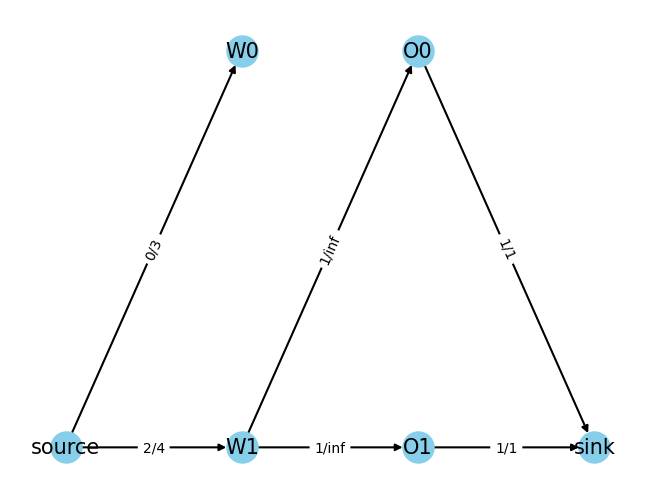

Matrix X (Transport Time):
[[4 2]
 [3 2]]
- Transportation time from W0 to O0 is 4 units.
- Transportation time from W0 to O1 is 3 units.
- Transportation time from W1 to O0 is 2 units.
- Transportation time from W1 to O1 is 2 units.

Vector Y (Demand):
[1 1]
- O0 demands 1 unit(s) of the product.
- O1 demands 1 unit(s) of the product.

Vector Z (Stock):
[3 4]
- W0 has 3 unit(s) of the product in stock.
- W1 has 4 unit(s) of the product in stock.

Optimal Allocation Strategy:
- W1 sends 1 unit(s) to O0 (2 time units).
- W1 sends 1 unit(s) to O1 (2 time units).
The optimal allocation minimizes the maximum transportation time, which in this example is 2 time units.


In [95]:
# Update the visualization function to generate data-specific textual explanations
def visualize_graph_with_data_and_flow(G, flow_dict, X, Y, Z):
    """
    Visualizes the graph with flow information and provides specific textual explanations.
    
    :param G: The graph to visualize
    :param flow_dict: The flow dictionary obtained from max flow algorithm
    :param X: Transport Time Matrix
    :param Y: Demand Array
    :param Z: Stock Array
    """
    # Draw the graph
    pos = {}
    num_warehouses = Z.shape[0]
    num_orders = Y.shape[0]
    
    max_vertical = max(num_warehouses, num_orders)
    mid_vertical = max_vertical / 2

    pos['source'] = (0, mid_vertical)
    for w in range(num_warehouses):
        pos[f"W{w}"] = (1, max_vertical - w)
    for o in range(num_orders):
        pos[f"O{o}"] = (2, max_vertical - o)
    pos['sink'] = (3, mid_vertical)

    nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=15, width=1.5)
    
    # Add flow labels to edges
    flow_labels = {}
    for u, v, d in G.edges(data=True):
        flow_labels[(u, v)] = f"{flow_dict[u].get(v, 0)}/{d['capacity']}"

    nx.draw_networkx_edge_labels(G, pos, edge_labels=flow_labels)
    
    plt.show()
    
    # Print matrices and generate data-specific textual explanations
    print("Matrix X (Transport Time):")
    print(X)
    for i in range(num_warehouses):
        for j in range(num_orders):
            print(f"- Transportation time from W{i} to O{j} is {X[j, i]} units.")
    print()
    
    print("Vector Y (Demand):")
    print(Y)
    for i, y in enumerate(Y):
        print(f"- O{i} demands {y} unit(s) of the product.")
    print()
    
    print("Vector Z (Stock):")
    print(Z)
    for i, z in enumerate(Z):
        print(f"- W{i} has {z} unit(s) of the product in stock.")
    print()
    
    print("Optimal Allocation Strategy:")
    for i in range(num_orders):
        for j in range(num_warehouses):
            flow = flow_dict[f'W{j}'].get(f'O{i}', 0)
            if flow > 0:
                print(f"- W{j} sends {flow} unit(s) to O{i} ({X[i, j]} time units).")
    max_time = np.max(np.array([[flow_dict[f'W{j}'].get(f'O{i}', 0) for j in range(num_warehouses)] for i in range(num_orders)]) * X)
    print(f"The optimal allocation minimizes the maximum transportation time, which in this example is {max_time} time units.")

# Test the updated visualization function
A, max_time, G_test = find_optimal_allocation_fixed(X_test, Y_test, Z_test)
_, flow_dict_test = nx.maximum_flow(G_test, 'source', 'sink')
visualize_graph_with_data_and_flow(G_test, flow_dict_test, X_test, Y_test, Z_test)


## Step4: handling priority (temporary)

### **Enhanced Approach with Priority Considerations**

Let's delve into the updated methodology that incorporates order priority in the allocation process. While the current greedy approach hinges on priority, future versions will embrace more sophisticated methods, including embedding priority directly within the network flow for a more nuanced optimization.

**Breakdown of New Functions**:

1. **Function: allocate_based_on_priority(Y, Z, priority_order)**
    - **Objective**: Tailors allocations to reflect the priority sequence of orders.
    - **Procedure**:
        a. Create an empty allocation matrix `A`.
        b. Traverse orders by their priority (as outlined in `priority_order`).
        c. For every order, sequentially allocate products from warehouses. The process halts once the warehouse depletes or the order is wholly catered for.
        d. Showcase the allocation matrix `A`.
    
2. **Function: find_optimal_allocation_with_priority(X, Y, Z, priority_order)**
    - **Objective**: Fuses priority considerations into the comprehensive allocation routine.
    - **Procedure**:
        a. **Priority-based Allocation**: Deploy the `allocate_based_on_priority` function to guarantee the early satisfaction of higher-priority orders.
        b. **Satisfaction Analysis**: Should all orders be catered for by available inventory, embark on the `find_optimal_allocation_fixed` function to discern the universal optimal solution.
        c. **Insufficiency Protocol**: In events where inventory falls short, resort to the initial priority-based allocation and evaluate the maximum transportation duration.
        d. Unveil the resultant allocation matrix `A` and corresponding maximum transportation timeframe.
   
### **Evaluation of Methodology**:

Turning to the test matrices and given priority sequence \(priority\_order\_test\):

Upon scrutiny of `X_test_priority`, `Y_test_priority`, and `Z_test_priority`, it emerges that the warehouse inventory is inadequate to fulfill all orders. Following the priority sequence `[0, 1]`, order O0 receives precedence over O1.

Deploying `find_optimal_allocation_with_priority` with these data sets will yield an allocation matrix `A`, accompanied by the maximal transportation duration, mirroring the priority-centric allocation mechanism. Remember, subsequent versions of this methodology will adopt more refined allocation methods that are deeply embedded in the network flow paradigm.

In [104]:
# Define the allocate_based_on_priority function
def allocate_based_on_priority(Y, Z, priority_order):
    A = np.zeros((len(Y), len(Z)))
    for order_index in priority_order:
        for warehouse_index in range(len(Z)):
            allocation = min(Z[warehouse_index], Y[order_index])
            A[order_index][warehouse_index] = allocation
            Z[warehouse_index] -= allocation
            Y[order_index] -= allocation
    return A

# Define the main function integrating priority considerations
def find_optimal_allocation_with_priority(X, Y, Z, priority_order):
    # Step 1: Initial Allocation based on priority
    initial_Y = Y.copy()
    initial_Z = Z.copy()
    A_initial = allocate_based_on_priority(initial_Y, initial_Z, priority_order)
    is_satisfied = np.sum(initial_Y) == 0
    opt_G=None
    # Check if all orders are satisfied
    if np.sum(initial_Y) == 0:
        # Step 2: All orders can be satisfied, find the global optimal solution
        A, max_time,opt_G = find_optimal_allocation_fixed(X, Y, Z)
    else:
        # Some orders can't be satisfied, use the initial allocation based on priority
        A = A_initial
        max_time = np.max(A * X)  # Calculate the maximum transportation time
        
    return A, max_time,opt_G,is_satisfied

# Test the function with priority considerations
X_test_priority = np.array([[4, 2], [3, 2]])
Y_test_priority = np.array([1, 1])
Z_test_priority = np.array([1, 1])  # Not enough inventory to satisfy all orders
priority_order_test = np.array([0, 1])

find_optimal_allocation_with_priority(X_test_priority, Y_test_priority, Z_test_priority, priority_order_test)


(array([[0, 1],
        [1, 0]]),
 3,
 True)

## Step5: test

### Methodology and Rationale:

The function `run_all_tests()` is engineered to automate the testing process for the product allocation algorithm across multiple scenarios. Here's an elaboration of its operation:

1. **Acquisition of Test Data**:
    - Using the `generate_test_data` function, the function fetches all pertinent test data. This encompasses handcrafted cases and data stored in a JSON file, whose location is specified by the `json_file_path`.

2. **Sequential Test Execution**:
    - For every individual test scenario:
        a. A brief about the test is printed for context.
        b. The primary function, `find_optimal_allocation_with_priority`, is invoked to discern the optimal product distribution, taking into account order priorities.
        c. The `visualize_graph_with_data` function is leveraged to portray the relevant graph. Notably, to ensure comprehensive visualization, edges are framed with an infinite capacity (`np.inf`), capturing all feasible routes, irrespective of actual flow values.
        d. The derived allocation matrix `A` and the ascertained maximal transportation duration are showcased.
        e. To neatly segment results from distinct tests, a separator (`=`) is employed.

3. **Commencement**:
    - To round off, the `run_all_tests()` function is triggered, activating all test runs and subsequent result presentations.

When this function is in action, expect a methodical walkthrough of various test instances, coupled with their graphical illustrations and outcomes (namely, allocation strategies and respective transportation times). This structured approach offers a lucid snapshot of the algorithm's efficacy over diverse data paradigms and its adaptability to different constraints and order rankings.

Test Case 1: All orders can be satisfied, no priority needed


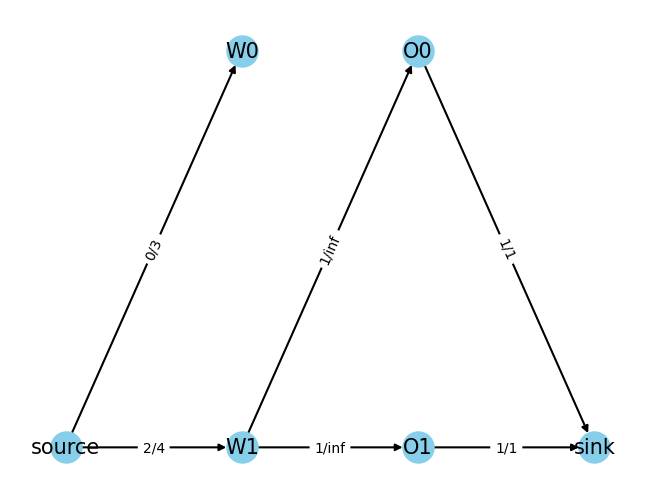

Matrix X (Transport Time):
[[4 2]
 [3 2]]
- Transportation time from W0 to O0 is 4 units.
- Transportation time from W0 to O1 is 3 units.
- Transportation time from W1 to O0 is 2 units.
- Transportation time from W1 to O1 is 2 units.

Vector Y (Demand):
[1 1]
- O0 demands 1 unit(s) of the product.
- O1 demands 1 unit(s) of the product.

Vector Z (Stock):
[3 4]
- W0 has 3 unit(s) of the product in stock.
- W1 has 4 unit(s) of the product in stock.

Optimal Allocation Strategy:
- W1 sends 1 unit(s) to O0 (2 time units).
- W1 sends 1 unit(s) to O1 (2 time units).
The optimal allocation minimizes the maximum transportation time, which in this example is 2 time units.
Allocation Matrix A:
[[0 1]
 [0 1]]
Maximum Transportation Time: 2
Test Case 2: Not all orders can be satisfied, and priority comes into play
Allocation Matrix A:
[[5. 5.]
 [0. 0.]]
Maximum Transportation Time: 40.0
Test Case 3: All orders can be satisfied, but not in a greedy manner


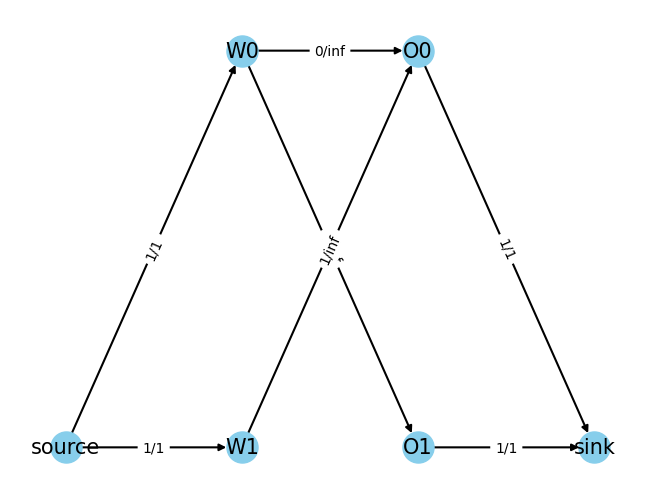

Matrix X (Transport Time):
[[1 1]
 [1 2]]
- Transportation time from W0 to O0 is 1 units.
- Transportation time from W0 to O1 is 1 units.
- Transportation time from W1 to O0 is 1 units.
- Transportation time from W1 to O1 is 2 units.

Vector Y (Demand):
[1 1]
- O0 demands 1 unit(s) of the product.
- O1 demands 1 unit(s) of the product.

Vector Z (Stock):
[1 1]
- W0 has 1 unit(s) of the product in stock.
- W1 has 1 unit(s) of the product in stock.

Optimal Allocation Strategy:
- W1 sends 1 unit(s) to O0 (1 time units).
- W0 sends 1 unit(s) to O1 (1 time units).
The optimal allocation minimizes the maximum transportation time, which in this example is 1 time units.
Allocation Matrix A:
[[0 1]
 [1 0]]
Maximum Transportation Time: 1
Test Case 4: Not all orders can be satisfied, and priority comes into play
Allocation Matrix A:
[[0.]
 [0.]
 [2.]]
Maximum Transportation Time: 4.0
Test Case 5: All orders can be satisfied, no priority needed


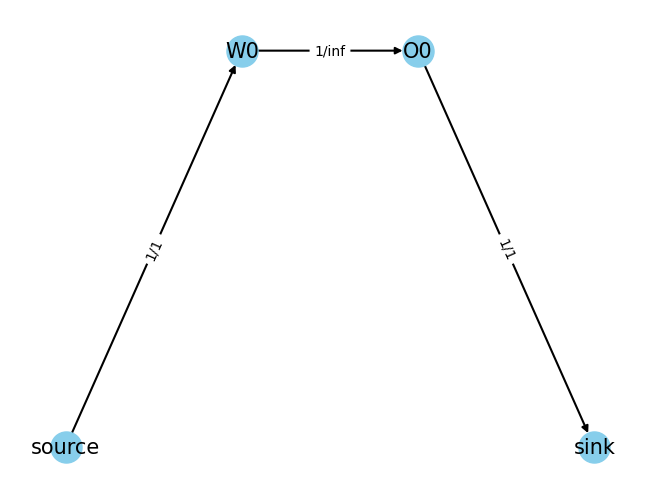

Matrix X (Transport Time):
[[1]]
- Transportation time from W0 to O0 is 1 units.

Vector Y (Demand):
[1]
- O0 demands 1 unit(s) of the product.

Vector Z (Stock):
[1]
- W0 has 1 unit(s) of the product in stock.

Optimal Allocation Strategy:
- W0 sends 1 unit(s) to O0 (1 time units).
The optimal allocation minimizes the maximum transportation time, which in this example is 1 time units.
Allocation Matrix A:
[[1]]
Maximum Transportation Time: 1
Test Case 6: Not all orders can be satisfied, but all warehouses can contribute to the high priority order


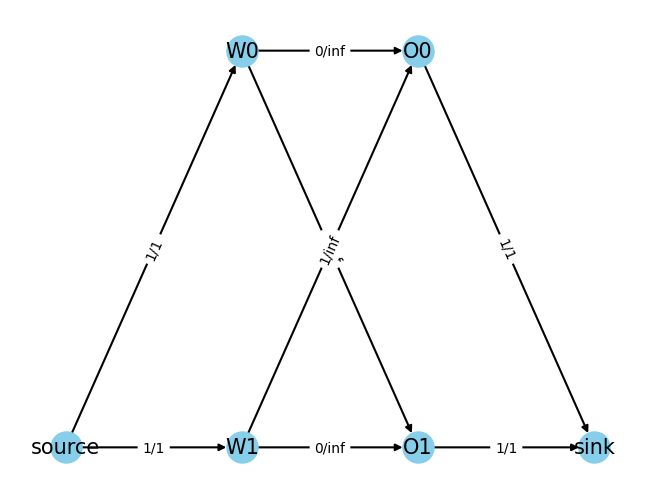

Matrix X (Transport Time):
[[1 1]
 [0 0]]
- Transportation time from W0 to O0 is 1 units.
- Transportation time from W0 to O1 is 0 units.
- Transportation time from W1 to O0 is 1 units.
- Transportation time from W1 to O1 is 0 units.

Vector Y (Demand):
[1 1]
- O0 demands 1 unit(s) of the product.
- O1 demands 1 unit(s) of the product.

Vector Z (Stock):
[1 1]
- W0 has 1 unit(s) of the product in stock.
- W1 has 1 unit(s) of the product in stock.

Optimal Allocation Strategy:
- W1 sends 1 unit(s) to O0 (1 time units).
- W0 sends 1 unit(s) to O1 (0 time units).
The optimal allocation minimizes the maximum transportation time, which in this example is 1 time units.
Allocation Matrix A:
[[0 1]
 [1 0]]
Maximum Transportation Time: 1
Test Case 7: Complex case
Allocation Matrix A:
[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 2. 18.]
 [ 0.  0.]]
Maximum Transportation Time: 18.0
Test Case 8: All orders can be satisfied, multiple optimal solutions


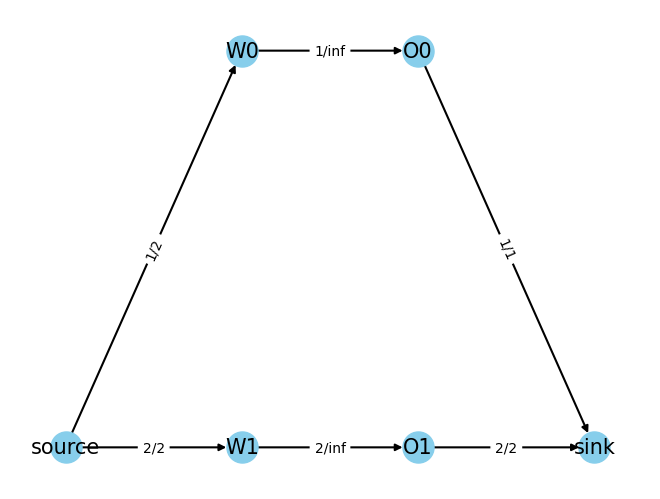

Matrix X (Transport Time):
[[2 3]
 [3 2]]
- Transportation time from W0 to O0 is 2 units.
- Transportation time from W0 to O1 is 3 units.
- Transportation time from W1 to O0 is 3 units.
- Transportation time from W1 to O1 is 2 units.

Vector Y (Demand):
[1 2]
- O0 demands 1 unit(s) of the product.
- O1 demands 2 unit(s) of the product.

Vector Z (Stock):
[2 2]
- W0 has 2 unit(s) of the product in stock.
- W1 has 2 unit(s) of the product in stock.

Optimal Allocation Strategy:
- W0 sends 1 unit(s) to O0 (2 time units).
- W1 sends 2 unit(s) to O1 (2 time units).
The optimal allocation minimizes the maximum transportation time, which in this example is 4 time units.
Allocation Matrix A:
[[1 0]
 [0 2]]
Maximum Transportation Time: 4
Test Case 9: All orders can be satisfied, optimal solution is non-obvious


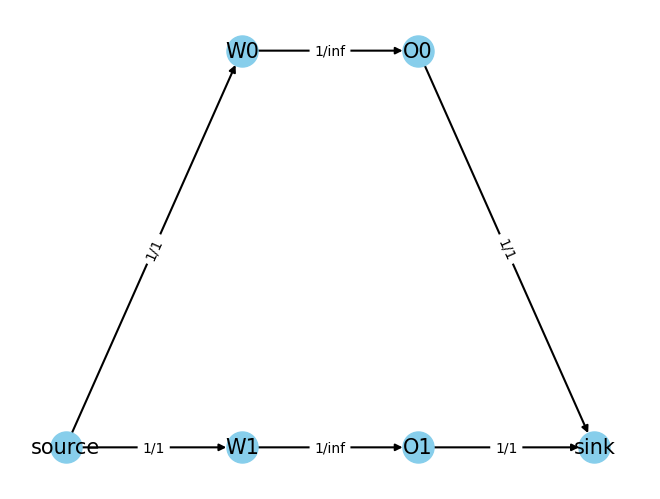

Matrix X (Transport Time):
[[ 1 10]
 [10  1]]
- Transportation time from W0 to O0 is 1 units.
- Transportation time from W0 to O1 is 10 units.
- Transportation time from W1 to O0 is 10 units.
- Transportation time from W1 to O1 is 1 units.

Vector Y (Demand):
[1 1]
- O0 demands 1 unit(s) of the product.
- O1 demands 1 unit(s) of the product.

Vector Z (Stock):
[1 1]
- W0 has 1 unit(s) of the product in stock.
- W1 has 1 unit(s) of the product in stock.

Optimal Allocation Strategy:
- W0 sends 1 unit(s) to O0 (1 time units).
- W1 sends 1 unit(s) to O1 (1 time units).
The optimal allocation minimizes the maximum transportation time, which in this example is 1 time units.
Allocation Matrix A:
[[1 0]
 [0 1]]
Maximum Transportation Time: 1
Test Case 10: Not all orders can be satisfied due to limited inventory
Allocation Matrix A:
[[2. 0.]
 [0. 1.]]
Maximum Transportation Time: 2.0
Test Case 11: Single warehouse and single order


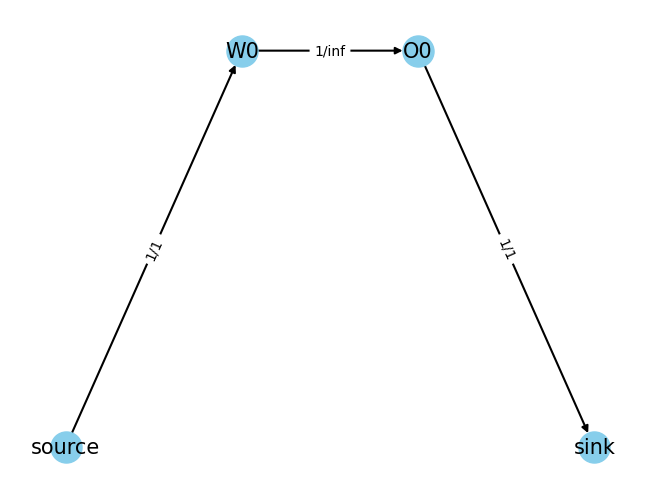

Matrix X (Transport Time):
[[5]]
- Transportation time from W0 to O0 is 5 units.

Vector Y (Demand):
[1]
- O0 demands 1 unit(s) of the product.

Vector Z (Stock):
[1]
- W0 has 1 unit(s) of the product in stock.

Optimal Allocation Strategy:
- W0 sends 1 unit(s) to O0 (5 time units).
The optimal allocation minimizes the maximum transportation time, which in this example is 5 time units.
Allocation Matrix A:
[[1]]
Maximum Transportation Time: 5
Test Case 12: More warehouses than orders


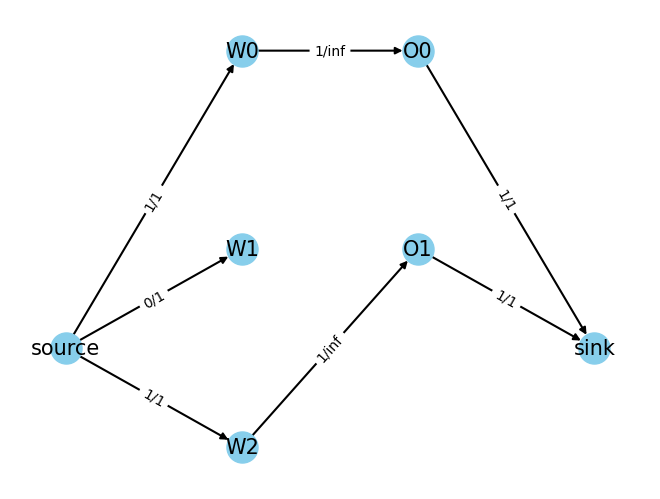

Matrix X (Transport Time):
[[1 2 3]
 [3 2 1]]
- Transportation time from W0 to O0 is 1 units.
- Transportation time from W0 to O1 is 3 units.
- Transportation time from W1 to O0 is 2 units.
- Transportation time from W1 to O1 is 2 units.
- Transportation time from W2 to O0 is 3 units.
- Transportation time from W2 to O1 is 1 units.

Vector Y (Demand):
[1 1]
- O0 demands 1 unit(s) of the product.
- O1 demands 1 unit(s) of the product.

Vector Z (Stock):
[1 1 1]
- W0 has 1 unit(s) of the product in stock.
- W1 has 1 unit(s) of the product in stock.
- W2 has 1 unit(s) of the product in stock.

Optimal Allocation Strategy:
- W0 sends 1 unit(s) to O0 (1 time units).
- W2 sends 1 unit(s) to O1 (1 time units).
The optimal allocation minimizes the maximum transportation time, which in this example is 1 time units.
Allocation Matrix A:
[[1 0 0]
 [0 0 1]]
Maximum Transportation Time: 1
Test Case 13: More orders than warehouses
Allocation Matrix A:
[[1.]
 [0.]
 [0.]]
Maximum Transportation Time: 

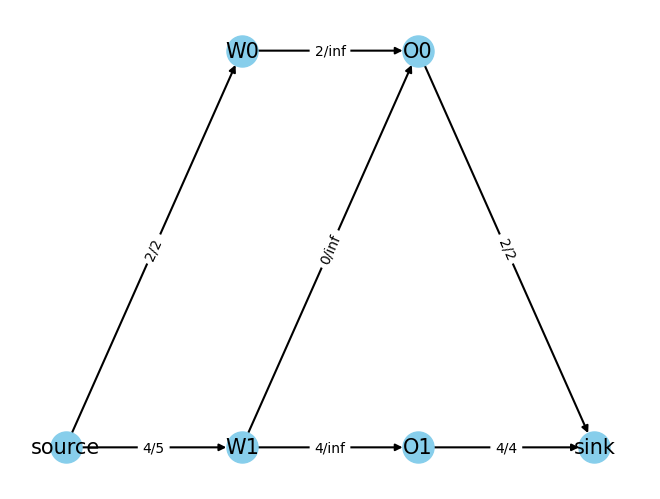

Matrix X (Transport Time):
[[4 3]
 [6 2]]
- Transportation time from W0 to O0 is 4 units.
- Transportation time from W0 to O1 is 6 units.
- Transportation time from W1 to O0 is 3 units.
- Transportation time from W1 to O1 is 2 units.

Vector Y (Demand):
[2 4]
- O0 demands 2 unit(s) of the product.
- O1 demands 4 unit(s) of the product.

Vector Z (Stock):
[2 5]
- W0 has 2 unit(s) of the product in stock.
- W1 has 5 unit(s) of the product in stock.

Optimal Allocation Strategy:
- W0 sends 2 unit(s) to O0 (4 time units).
- W1 sends 4 unit(s) to O1 (2 time units).
The optimal allocation minimizes the maximum transportation time, which in this example is 8 time units.
Allocation Matrix A:
[[2 0]
 [0 4]]
Maximum Transportation Time: 8
Test Case 18: Randomly generated test case


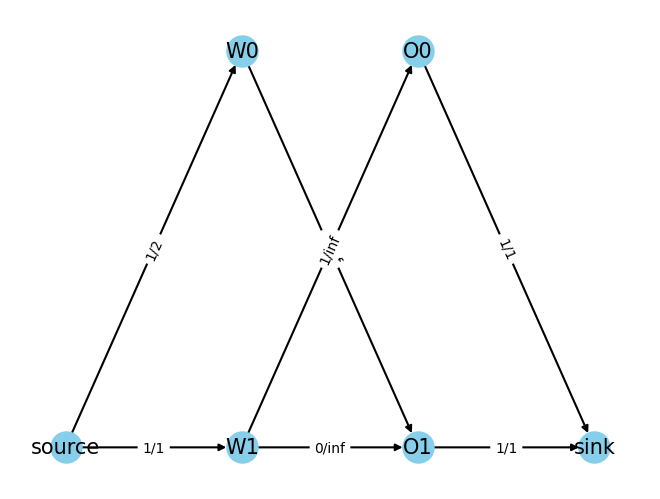

Matrix X (Transport Time):
[[10  9]
 [ 3  5]]
- Transportation time from W0 to O0 is 10 units.
- Transportation time from W0 to O1 is 3 units.
- Transportation time from W1 to O0 is 9 units.
- Transportation time from W1 to O1 is 5 units.

Vector Y (Demand):
[1 1]
- O0 demands 1 unit(s) of the product.
- O1 demands 1 unit(s) of the product.

Vector Z (Stock):
[2 1]
- W0 has 2 unit(s) of the product in stock.
- W1 has 1 unit(s) of the product in stock.

Optimal Allocation Strategy:
- W1 sends 1 unit(s) to O0 (9 time units).
- W0 sends 1 unit(s) to O1 (3 time units).
The optimal allocation minimizes the maximum transportation time, which in this example is 9 time units.
Allocation Matrix A:
[[0 1]
 [1 0]]
Maximum Transportation Time: 9


In [105]:

# Define a function to run all tests
def run_all_tests():
    test_data_with_handcrafted = generate_test_data(include_handcrafted=True, json_file_path=json_file_path)
    
    for i, test_case in enumerate(test_data_with_handcrafted):
        print(f"Test Case {i+1}: {test_case['description']}")
        
        # Run the find_optimal_allocation_with_priority function
        A, max_time,G,is_satisfied = find_optimal_allocation_with_priority(
            test_case['X'], test_case['Y'], test_case['Z'], test_case['priority_order']
        )
        if is_satisfied:
            # Visualize the final graph
            _, flow_dict_test = nx.maximum_flow(G, 'source', 'sink')
            visualize_graph_with_data_and_flow(G,flow_dict_test, test_case['X'], test_case['Y'], test_case['Z'])
        
        # Display the results
        print("Allocation Matrix A:")
        print(A)
        print("Maximum Transportation Time:", max_time)
        print("="*50)

# Run all tests
run_all_tests()


Test Case 1: Randomly generated test case


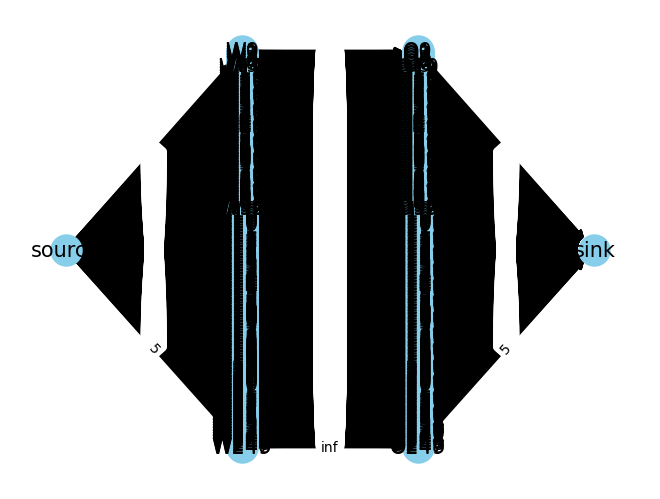

Matrix X (Transport Time):
[[ 6  5  3 ...  7  6  2]
 [ 7 10  9 ...  5  5  2]
 [10  2  9 ...  9  9  5]
 ...
 [ 6  6  4 ...  2  7  8]
 [ 7  2  4 ...  9  9  8]
 [ 5  3  5 ...  9  1  2]]

Vector Y (Demand):
[4 5 1 5 4 3 1 5 1 2 4 5 2 4 2 3 5 3 3 2 4 5 4 2 2 2 2 2 5 5 5 4 4 4 3 5 1
 1 1 3 1 4 1 2 4 4 1 2 3 1 1 4 5 3 4 4 4 2 2 4 2 1 4 5 2 3 3 5 1 5 1 3 4 2
 5 3 2 4 1 5 5 2 2 4 5 1 2 3 3 5 1 4 4 1 5 2 3 5 1 2 3 1 2 5 5 4 4 1 4 4 5
 2 3 3 2 5 4 5 1 2 5 2 5 1 1 3 1 2 4 2 1 5 2 4 5 3 1 2 3 4 5 4 4 5 2 4 2 1
 2 4 1 5 1 3 5 5 5 1 1 5 2 3 4 1 3 2 5 3 2 3 5 1 5 2 4 2 2 2 4 1 1 4 2 1 3
 1 1 2 3 3 5 3 2 3 4 5 3 5 4 1 1 5 2 1 3 5 3 4 3 4 5 3 2 4 4 3 1 2 1 1 1 5
 2 1 4 5 2 3 1 5 5 4 3 2 2 3 3 2 4 1 1 1 5 3 4 2 2 1 4 5]

Vector Z (Stock):
[1 4 3 2 5 4 1 1 4 3 4 5 2 3 4 5 5 1 1 2 5 5 2 3 1 2 1 3 2 3 5 1 1 5 4 5 5
 1 1 4 1 5 1 3 5 5 5 2 3 4 5 4 3 4 2 1 3 1 5 4 3 5 4 2 4 5 5 4 4 4 1 3 5 3
 3 3 1 4 3 4 3 5 2 5 1 1 2 2 3 5 3 1 3 1 3 3 5 3 5 5 3 2 2 3 5 3 5 1 3 5 1
 1 2 2 3 4 3 5 3 5 3 2 2 3 3 5 1 3 4 5 1 3 2 

In [106]:

# Define a function to run all tests
def run_all_tests():
    test_data_with_handcrafted = generate_test_data(num_cases=1, num_warehouses=250, num_orders=250)
    
    for i, test_case in enumerate(test_data_with_handcrafted):
        print(f"Test Case {i+1}: {test_case['description']}")
        
        # Run the find_optimal_allocation_with_priority function
        A, max_time,_,is_satisfied = find_optimal_allocation_with_priority(
            test_case['X'], test_case['Y'], test_case['Z'], test_case['priority_order']
        )
        if is_satisfied:
            # Visualize the final graph
            G = build_graph(test_case['X'], test_case['Y'], test_case['Z'], np.inf)  # Use np.inf to include all edges
            visualize_graph_with_data(G, test_case['X'], test_case['Y'], test_case['Z'])
        
        # Display the results
        print("Allocation Matrix A:")
        print(A)
        print("Maximum Transportation Time:", max_time)
        print("="*50)

# Run all tests
run_all_tests()


# TODO

0. complextiy optimize and anlyze: there is no need to build n*m edges.
1. list the requirements sheets.
----
1. use near linear algorithm
   
2. is using max flow algorithm the best way to solve this problem?
3. is using max flow to find final strategy reasonable?
4. change priority